In [1]:
%reload_ext autoreload
%autoreload 2

In [10]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import importlib


sys.path.append(os.path.abspath(os.path.join('..', '..','photoz','modules')))

# Fit only one Light Curve

In [5]:
from pyGRBz.pyGRBz import GRB_photoZ

In [6]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/LC/')

In [7]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='/data/lc/',data_name=['GRB_24'])


Observations:
  Name  time_since_burst band   flux  ...  zp flux_unit detection telescope
------ ---------------- ---- ------- ... --- --------- --------- ---------
GRB_24             60.0  gri 12.7208 ...   -        AB         1   colibri
GRB_24             60.0   zy 11.1982 ...   -        AB         1   colibri
GRB_24             95.0    r 13.7633 ...   -        AB         1   colibri
GRB_24             95.0    y 11.8512 ...   -        AB         1   colibri
GRB_24            130.0    i  12.935 ...   -        AB         1   colibri
GRB_24            130.0    z 12.5265 ...   -        AB         1   colibri
GRB_24            165.0    g 17.6945 ...   -        AB         1   colibri
GRB_24            165.0    y  12.804 ...   -        AB         1   colibri
GRB_24            200.0    r 15.0577 ...   -        AB         1   colibri
GRB_24            200.0    z 13.2851 ...   -        AB         1   colibri
GRB_24            235.0    i  13.983 ...   -        AB         1   colibri
GRB_24   

In [8]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
  Name  time_since_burst band ... ext_mag     flux_corr        flux_corr_err   
                             ...              microJy            microJy      
------ ---------------- ---- ... ------- ------------------ ------------------
GRB_24            270.0    g ...     0.0 134.67283420689427 2.6934566841378853
GRB_24            165.0    g ...     0.0 303.52886644741886  6.070577328948377
GRB_24             60.0  gri ...     0.0  29626.47625652036  592.5295251304073
GRB_24            305.0    r ...     0.0  1705.611046139386  34.11222092278772
GRB_24            200.0    r ...     0.0   3442.86505003857   68.8573010007714
GRB_24             95.0    r ...     0.0 11341.748168284306 226.83496336568612
GRB_24            235.0    i ...     0.0  9264.031007363974 185.28062014727948
GRB_24            130.0    i ...     0.0 24322.040090738108 486.44080181476215
GRB_24            340.0    i ...     0.0  4989.304385354617  99.78608770709234
GRB_24            130.0    z ...  

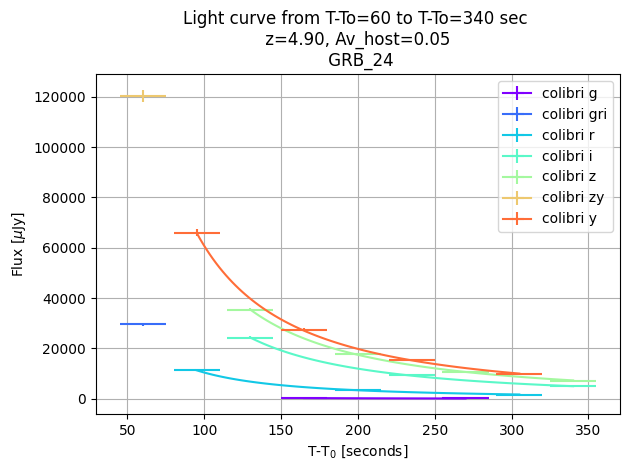

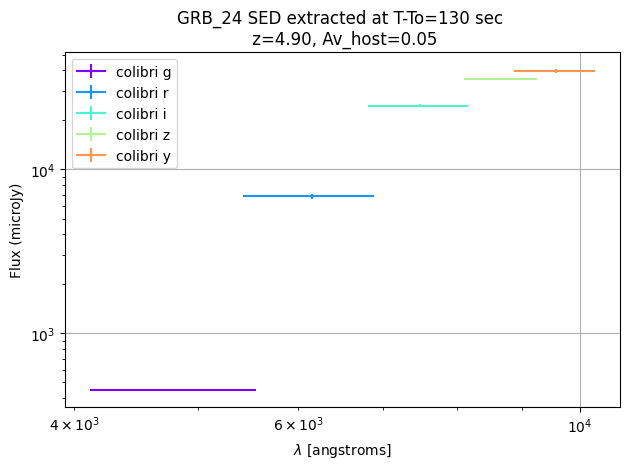


SEDS:
  Name  time_since_burst band        flux              flux_err       flux_unit
              s                                                               
------ ---------------- ---- ------------------ -------------------- ---------
GRB_24              130    g 17.267384134042068 0.014652373116307625        AB
GRB_24              130    r 14.314226709228329 0.036068244027647134        AB
GRB_24              130    i 12.935000000000002 0.021714724095162594        AB
GRB_24              130    z 12.526500000000006 0.021714724095162594        AB
GRB_24              130    y 12.401411234194867  0.03604448371911008        AB



In [11]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

#photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)
photoz.extract_sed(model='SPL',method='fixed',time_SED=130)

In [12]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/1 	 Object: GRB_24 

z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████| 1500/1500 [00:06<00:00, 226.29it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 30;
tau: [138.19013091 150.48986603 174.72113413 156.1536285 ]



Autocorrelation time: 138.19 steps


Mean acceptance fraction: 0.053

Best fit:
z: 4.947  Av: 0.039  beta: 0.841  Norm: 1.158     chi2: 1.680

Mean Proba: 6.44e-02
Sum Proba: 2.12e+03

68% - 1 sigma:
z: 4.896 +0.056 -4.807
Av: 0.245 +4.093 -0.143
Beta: 0.572 +2.111 -0.457
norm: 2.703 +6.297 -1.235

95% - 2 sigma:
z: 4.896 +0.065 -4.894
Av: 0.245 +4.485 -0.215
Beta: 0.572 +2.415 -0.551
norm: 2.703 +7.227 -1.592

99% - 3 sigma:
z: 4.896 +0.076 -4.896
Av: 0.245 +7.229 -0.243
Beta: 0.572 +2.427 -0.567
norm: 2.703 +7.287 -1.695


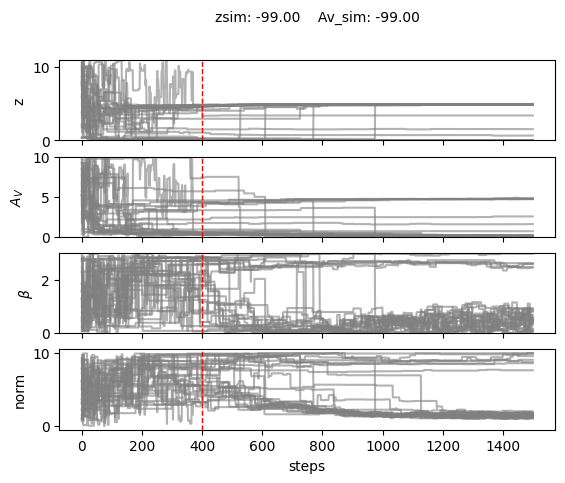

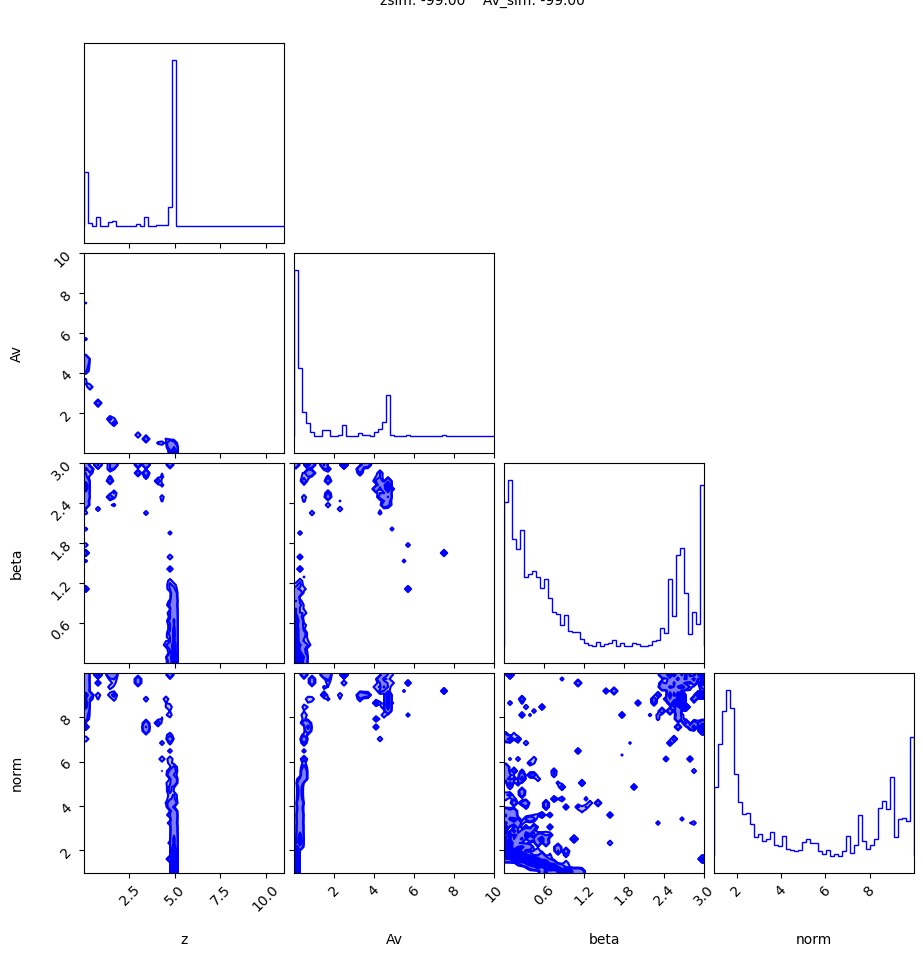


For best SED plot:
- Median values PDF: 4.896 0.245 0.572 2.703
- Best fit: 4.947 0.039 0.841 1.158


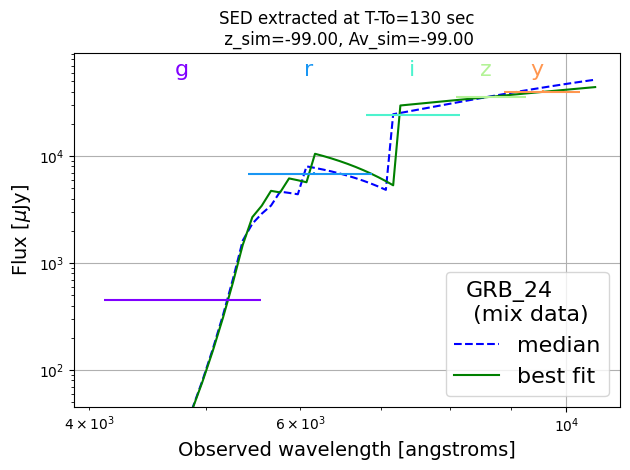


List of GRB not detected: []

None


In [13]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(
    ext_law='smc',
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=False
)

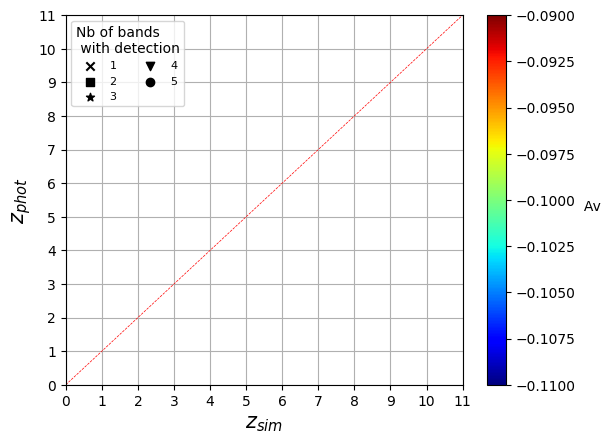

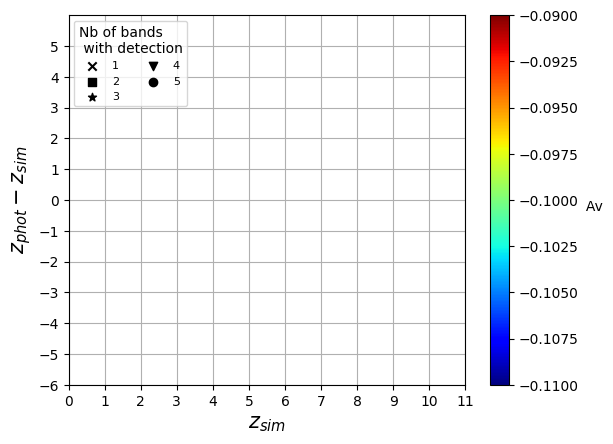

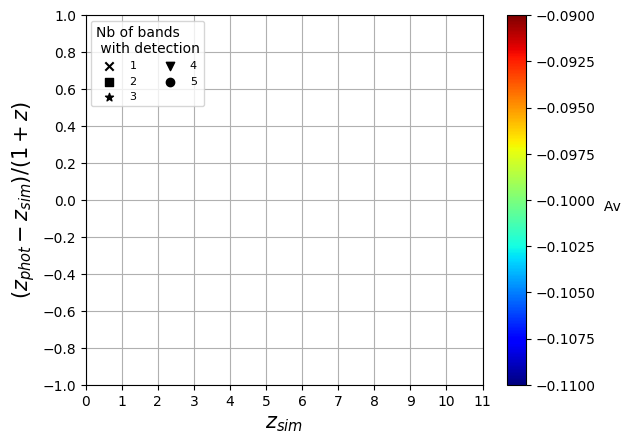

In [14]:
# Plot all redshift estimations together
photoz.plot_zsim_zphot(
    input_file='best_fits_all_smc',
    output_suffix='_smc_1sig',
    sigma=1,
    input_dir='/results/Tuto/LC/',
    output_dir='/results/Tuto/LC/'
)